In [1]:
import pandas as pd
import os

### user

In [2]:
df_user = pd.read_csv('../data/raw/train/user.csv', sep=',')
df_user.shape

(900000, 3)

In [3]:
df_user.head()

,user_id,age,gender
0,1,4,1
1,2,10,1
2,3,7,2
3,4,5,1
4,5,4,1


In [4]:
df_user.describe()

,user_id,age,gender
count,900000.000000,900000.000000,900000.000000
mean,450000.500000,4.246100,1.330433
std,259807.765474,2.003552,0.470369
min,1.000000,1.000000,1.000000
25%,225000.750000,3.000000,1.000000
50%,450000.500000,4.000000,1.000000
75%,675000.250000,6.000000,2.000000
max,900000.000000,10.000000,2.000000


In [5]:
df_user[['age', 'user_id']].groupby('age').count().plot.bar()

In [6]:
tmp = df_user[['user_id', 'age']].groupby('age').count().reset_index()
tmp.columns = ['age', 'user_record']
tmp['user_rate'] = tmp['user_record'].apply(lambda x: round(x/tmp['user_record'].sum(), 4))
tmp

,age,user_record,user_rate
0,1,35195,0.0391
1,2,149271,0.1659
2,3,202909,0.2255
3,4,150578,0.1673
4,5,130667,0.1452
5,6,101720,0.1130
6,7,66711,0.0741
7,8,31967,0.0355
8,9,19474,0.0216
9,10,11508,0.0128


In [7]:
print(dict(tmp[['age', 'user_rate']].values))

{1.0: 0.0391, 2.0: 0.1659, 3.0: 0.2255, 4.0: 0.1673, 5.0: 0.1452, 6.0: 0.113, 7.0: 0.0741, 8.0: 0.0355, 9.0: 0.0216, 10.0: 0.0128}


In [8]:
tmp['user_rate'].values

array([0.0391, 0.1659, 0.2255, 0.1673, 0.1452, 0.113 , 0.0741, 0.0355,
       0.0216, 0.0128])

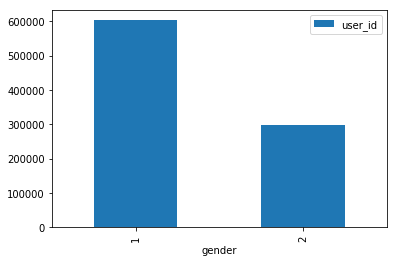

In [9]:
df_user[['gender', 'user_id']].groupby('gender').count().plot.bar()

In [10]:
tmp2 = df_user[['gender', 'user_id']].groupby('gender').count().reset_index()
tmp2.columns = ['gender', 'user_record']
tmp2['user_rate'] = tmp2['user_record'].apply(lambda x: round(x/900000, 4))
tmp2

,gender,user_record,user_rate
0,1,602610,0.6696
1,2,297390,0.3304


In [11]:
print(dict(tmp2[['gender', 'user_rate']].values))

{1.0: 0.6696, 2.0: 0.3304}


### ad

In [12]:
df_ad = pd.read_csv('../data/raw/train/ad.csv', sep=',')
df_ad.shape

(2481135, 6)

In [13]:
ad_cols = list(df_ad.columns)

In [14]:
df_ad.head()

,creative_id,ad_id,product_id,product_category,advertiser_id,industry
0,1,1,\N,5,381,78
1,4,4,\N,5,108,202
2,7,7,\N,5,148,297
3,8,8,\N,5,713,213
4,9,9,\N,5,695,213


In [15]:
df_ad.describe()

,creative_id,ad_id,product_category,advertiser_id
count,2.481135e+06,2.481135e+06,2.481135e+06,2.481135e+06
mean,2.192008e+06,1.888107e+06,7.805932e+00,2.741624e+04
std,1.285497e+06,1.099764e+06,6.770557e+00,1.534631e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
25%,1.076370e+06,9.391925e+05,2.000000e+00,1.497400e+04
50%,2.191948e+06,1.889017e+06,5.000000e+00,2.519700e+04
75%,3.304420e+06,2.839458e+06,1.800000e+01,3.825400e+04
max,4.445718e+06,3.812200e+06,1.800000e+01,6.296500e+04


#### 缺失值

In [16]:
sum(df_ad['product_id'] == '\\N') / df_ad.shape[0]

0.37463660784278163

In [17]:
sum(df_ad['industry'] == '\\N') / df_ad.shape[0]

0.040726522337559225

#### 枚举可能值

In [18]:
for col in ad_cols:
    print('current col is: ', col)
    print('num of vals is: ', len(df_ad[col].value_counts()))

current col is:  creative_id
num of vals is:  2481135
current col is:  ad_id
num of vals is:  2264190
current col is:  product_id
num of vals is:  33273
current col is:  product_category
num of vals is:  18
current col is:  advertiser_id
num of vals is:  52090
current col is:  industry
num of vals is:  326


### click

In [19]:
df_click = pd.read_csv('../data/raw/train/click_log.csv', sep=',')
df_click.shape

(30082771, 4)

In [20]:
click_cols = list(df_click.columns)

In [21]:
df_click.head()

,time,user_id,creative_id,click_times
0,9,30920,567330,1
1,65,30920,3072255,1
2,56,30920,2361327,1
3,6,309204,325532,1
4,59,309204,2746730,1


In [22]:
df_click.describe()

,time,user_id,creative_id,click_times
count,3.008277e+07,3.008277e+07,3.008277e+07,3.008277e+07
mean,4.801738e+01,4.498556e+05,1.676532e+06,1.063127e+00
std,2.592504e+01,2.599939e+05,1.308054e+06,2.982831e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.600000e+01,2.246130e+05,4.158100e+05,1.000000e+00
50%,4.900000e+01,4.498040e+05,1.508864e+06,1.000000e+00
75%,7.100000e+01,6.752420e+05,2.740464e+06,1.000000e+00
max,9.100000e+01,9.000000e+05,4.445718e+06,1.520000e+02


#### 点击异常值

In [23]:
print(dict(df_click['click_times'].value_counts()))

{1: 28426543, 2: 1507449, 3: 90356, 4: 43047, 5: 7507, 6: 3512, 7: 1529, 8: 1486, 9: 452, 10: 270, 11: 172, 12: 116, 13: 76, 14: 62, 15: 36, 16: 34, 17: 22, 18: 21, 21: 17, 20: 13, 19: 10, 22: 5, 23: 4, 26: 3, 32: 3, 27: 3, 30: 3, 24: 3, 25: 2, 29: 2, 33: 2, 37: 2, 28: 1, 67: 1, 34: 1, 35: 1, 36: 1, 43: 1, 44: 1, 50: 1, 152: 1}


In [24]:
df_click['click_times'].quantile(q=0.99)

2.0

In [25]:
df_click['click_times'].quantile(q=0.999)

4.0

In [26]:
df_click['click_times'] = df_click['click_times'].apply(lambda x: min(x, 2))
df_click.shape

(30082771, 4)

#### 枚举可能值

In [27]:
for col in click_cols:
    print('current col is: ', col)
    print('num of vals is: ', len(df_click[col].value_counts()))

current col is:  time
num of vals is:  91
current col is:  user_id
num of vals is:  900000
current col is:  creative_id
num of vals is:  2481135
current col is:  click_times
num of vals is:  2


In [28]:
df_click.sample(5)

,time,user_id,creative_id,click_times
15459287,30,333660,1538788,1
26397001,87,110931,3897545,1
10668132,45,885015,2113787,1
25799953,67,888673,3210264,1
12723699,75,186381,34453,1


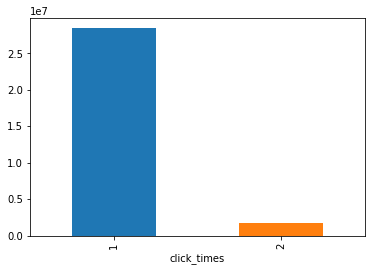

In [29]:
df_click.groupby('click_times')['user_id'].count().plot.bar()

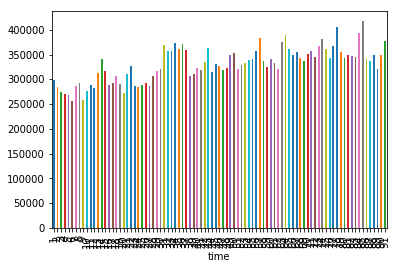

In [30]:
df_click.groupby('time')['user_id'].count().plot.bar()

#### 用户维度

In [31]:
df_click_user = df_click['user_id'].value_counts().to_frame().reset_index()
df_click_user.columns = ['user_id', 'user_record']
df_click_user.shape

(900000, 2)

In [32]:
df_click_user.head()

,user_id,user_record
0,839368,16868
1,157585,1706
2,677301,1661
3,178333,1321
4,549175,1273


In [33]:
df_click_user['user_record'].quantile(q=0.01)

9.0

In [34]:
df_click_user['user_record'].quantile(q=0.10)

11.0

In [35]:
df_click_user['user_record'].quantile(q=0.30)

16.0

In [36]:
df_click_user['user_record'].quantile(q=0.5)

24.0

In [37]:
df_click_user['user_record'].quantile(q=0.8)

46.0

In [38]:
df_click_user['user_record'].quantile(q=0.9)

66.0

In [39]:
df_click_user['user_record'].quantile(q=0.95)

89.0

In [40]:
df_click_user['user_record'].quantile(q=0.99)

156.0

In [41]:
df_click_user['user_record'].quantile(q=0.999)

291.0

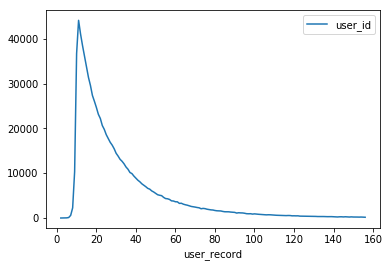

In [42]:
df_click_user[df_click_user['user_record'] <= 156].groupby('user_record').count().plot()

##### 用户观看记录，需截断

In [43]:
df_click_user[df_click_user['user_record'] <= 100].shape[0] / df_click_user.shape[0]

0.9632244444444444

#### 广告维度，需关联广告信息

In [44]:
df_click_creative = df_click['creative_id'].value_counts().to_frame().reset_index()
df_click_creative.columns = ['creative_id', 'creative_record']
df_click_creative.shape

(2481135, 2)

In [45]:
df_click_creative.head()

,creative_id,creative_record
0,108133,103033
1,37298,84043
2,304118,73876
3,1837000,70875
4,32571,69956


In [46]:
df_click_creative['creative_record'].quantile(q=0.01)

1.0

In [47]:
df_click_creative['creative_record'].quantile(q=0.5)

2.0

In [48]:
df_click_creative['creative_record'].quantile(q=0.99)

140.0

In [49]:
df_click_creative['creative_record'].quantile(q=0.999)

1111.7320000007749

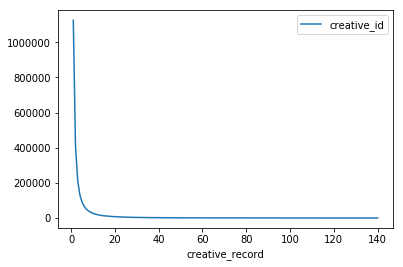

In [50]:
df_click_creative[df_click_creative['creative_record'] <= 140].groupby('creative_record').count().plot()

### merge

In [51]:
df_click_expand = pd.merge(df_click, df_click_user, on='user_id', how='left')
df_click_expand.shape

(30082771, 5)

In [52]:
df_click_expand.head()

,time,user_id,creative_id,click_times,user_record
0,9,30920,567330,1,42
1,65,30920,3072255,1,42
2,56,30920,2361327,1,42
3,6,309204,325532,1,25
4,59,309204,2746730,1,25


In [53]:
df_part1 = df_click_expand[df_click_expand['user_record'] <= 156]
df_part1.shape

(28130507, 5)

In [54]:
df_part2 = pd.DataFrame()
for idx, row in df_click_user[df_click_user['user_record'] > 156].iterrows():
    tmp_df = df_click_expand[df_click_expand['user_id'] == row['user_id']]
    tmp_df = tmp_df.sample(n=156, random_state=7)
    df_part2 = pd.concat([df_part2, tmp_df], axis=0)
df_part2.shape

(1394796, 5)

In [55]:
df = pd.concat([df_part1, df_part2], axis=0)
df.shape

(29525303, 5)

In [56]:
len(set(df['user_id']))

900000

In [57]:
del df_part1, df_part2

In [58]:
df = pd.merge(df, df_user, on='user_id', how='left')
df.shape

(29525303, 7)

In [59]:
df.head()

,time,user_id,creative_id,click_times,user_record,age,gender
0,9,30920,567330,1,42,2,1
1,65,30920,3072255,1,42,2,1
2,56,30920,2361327,1,42,2,1
3,6,309204,325532,1,25,6,1
4,59,309204,2746730,1,25,6,1


In [60]:
df = pd.merge(df, df_ad, on='creative_id', how='left')
df.shape

(29525303, 12)

In [61]:
df.head()

,time,user_id,creative_id,click_times,user_record,age,gender,ad_id,product_id,product_category,advertiser_id,industry
0,9,30920,567330,1,42,2,1,504423,30673,3,32638,319
1,65,30920,3072255,1,42,2,1,2642300,1261,2,6783,6
2,56,30920,2361327,1,42,2,1,2035918,1261,2,6783,6
3,6,309204,325532,1,25,6,1,292523,27081,3,32066,242
4,59,309204,2746730,1,25,6,1,2362208,\N,18,14682,88


#### 缺失值

In [62]:
sum(df['product_id'] == '\\N') / df.shape[0]

0.4202507252846821

In [63]:
sum(df['industry'] == '\\N') / df.shape[0]

0.04226947306857443